In [35]:
json_spec = dict(file_url='https://drive.google.com/uc?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA', file_path='ffhq-dataset-v2.json', file_size=267793842, file_md5='425ae20f06a4da1d4dc0f46d40ba5fd6')
from collections import OrderedDict, defaultdict
import json, os
with open(os.path.join('/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d',json_spec['file_path']), 'rb') as f:
    json_data = json.load(f, object_pairs_hook=OrderedDict)

KeyboardInterrupt: 

In [ ]:
import random
import numpy as np
key = random.choice(list(json_data.keys()))

lm = np.array(json_data[key]['in_the_wild']['face_landmarks'])


array([1970., 1994., 2030., 2058., 2126., 2230., 2358., 2494., 2642.,
       2794., 2914., 3034., 3142., 3214., 3246., 3286., 3310., 2074.,
       2158., 2290., 2418., 2542., 2730., 2850., 2986., 3118., 3210.,
       2634., 2638., 2642., 2650., 2474., 2562., 2650., 2738., 2822.,
       2202., 2282., 2370., 2454., 2366., 2274., 2830., 2906., 2998.,
       3082., 3006., 2914., 2338., 2446., 2562., 2654., 2738., 2854.,
       2962., 2854., 2742., 2650., 2554., 2442., 2378., 2562., 2654.,
       2738., 2926., 2738., 2650., 2558.])

In [ ]:
lm_chin          = lm[0  : 17]  # left-right
lm_eyebrow_left  = lm[17 : 22]  # left-right
lm_eyebrow_right = lm[22 : 27]  # left-right
lm_nose          = lm[27 : 31]  # top-down
lm_nostrils      = lm[31 : 36]  # top-down
lm_eye_left      = lm[36 : 42]  # left-clockwise
lm_eye_right     = lm[42 : 48]  # left-clockwise
lm_mouth_outer   = lm[48 : 60]  # left-clockwise
lm_mouth_inner   = lm[60 : 68]  # left-clockwise

# Calculate auxiliary vectors.
eye_left     = np.mean(lm_eye_left, axis=0)
eye_right    = np.mean(lm_eye_right, axis=0)
eye_avg      = (eye_left + eye_right) * 0.5
eye_to_eye   = eye_right - eye_left
mouth_left   = lm_mouth_outer[0]
mouth_right  = lm_mouth_outer[6]
mouth_avg    = (mouth_left + mouth_right) * 0.5
eye_to_mouth = mouth_avg - eye_avg

# Choose oriented crop rectangle.
x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]

x /= np.hypot(*x)
temp_x = x
x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
y = np.flipud(x) * [-1, 1]
q_scale = 1.8
x = q_scale * x
y = q_scale * y
c = eye_avg + eye_to_mouth * 0.1
quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
qsize = np.hypot(*x) * 2

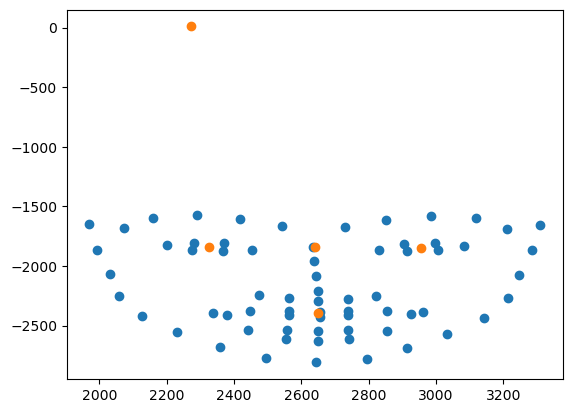

In [ ]:
import matplotlib.pyplot as plt


core_pts = np.concatenate([eye_left.reshape(1,2),eye_right.reshape(1,2),\
    mouth_avg.reshape(1,2),eye_avg.reshape(1,2),x.reshape(1,2)],0)

plt.scatter(lm[:,0],-lm[:,-1])


plt.scatter(core_pts[:,0], -core_pts[:,1])

In [ ]:
eye_to_mouth,np.flipud(eye_to_mouth)

(array([  9.66666667, 550.33333333]), array([550.33333333,   9.66666667]))

In [ ]:
tri_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/triplane_sample.npy'
import numpy as np
triplane = np.load(tri_path)

(256, 256)


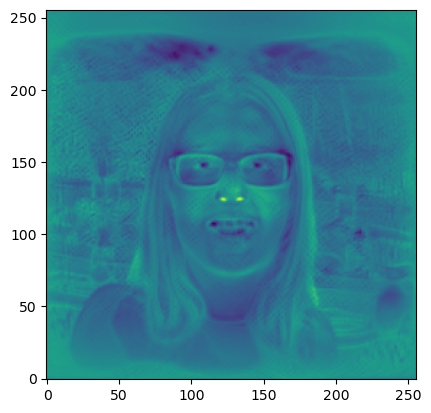

In [ ]:
one = triplane.squeeze(0)[0].sum(0)
one = (one-one.min())/(one.max()-one.min())
import matplotlib.pyplot as plt
print(one.shape)
plt.imshow(one,origin='lower')

In [1]:
item = 'candal.png_10000.png'
w_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/wild_w_picked'
wp_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/out_inversion_mino'
#wpp_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/wild_w++_picked'

#w_depth_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/out_minho_depth'
import imageio as io
import torch
from skimage.transform import resize

image_w = torch.tensor(resize(io.imread(w_path+'/'+item),(256,256*5)).transpose(2,0,1))
image_w = (image_w.to(torch.float32)*2 -1 ).unsqueeze(0)

image_wp = torch.tensor(resize(io.imread(wp_path+'/'+item),(256,256*5)).transpose(2,0,1))
image_wp = (image_wp.to(torch.float32)*2 -1).unsqueeze(0)


#image_wpp = torch.tensor(resize(io.imread(wpp_path+'/'+item),(256,256*5)).transpose(2,0,1))
#image_wpp = (image_wpp.to(torch.float32) ).unsqueeze(0)

#image_w_depth = torch.tensor(resize(io.imread(w_depth_path+'/'+item),(256,256*5)).transpose(2,0,1))
#image_w_depth = (image_w_depth.to(torch.float32) ).unsqueeze(0)

In [2]:
image_w.max(),image_w.min()

(tensor(1.), tensor(-1.))

In [3]:
gt = image_w[...,:256]
w_left = image_w[...,256*2:256*3]
wp_left = image_wp[...,256*2:256*3]

w_right = image_w[...,256*4:256*5]
wp_right = image_wp[...,256*4:256*5]

w_middle = image_w[...,256*3:256*4]
wp_middle = image_wp[...,256*3:256*4]

#w_depth_left = image_w_depth[...,256*2:256*3]

In [4]:
from training.idloss import IDLoss
criterion_ID  = IDLoss()


Loading ResNet ArcFace


In [5]:
loss_id = criterion_ID(gt, w_left)
print(loss_id)

loss_id_wp_left = criterion_ID(gt, wp_left)
print(loss_id_wp_left)

loss_id_w_depth_left = criterion_ID(gt, w_depth_left)
print(loss_id_w_depth_left)

tensor([0.6146], grad_fn=<RsubBackward1>)
tensor([0.5363], grad_fn=<RsubBackward1>)


NameError: name 'w_depth_left' is not defined

In [ ]:
loss_id = criterion_ID(gt, w_right)
print(loss_id)

loss_id_wp_right = criterion_ID(gt, wp_right)
print(loss_id_wp_right)

loss_id_w_depth_right = criterion_ID(gt, w_depth_right)
print(loss_id_w_depth_right)

tensor([0.0003], grad_fn=<RsubBackward1>)
tensor([0.0003], grad_fn=<RsubBackward1>)
tensor([0.0003], grad_fn=<RsubBackward1>)


In [ ]:
loss_id = criterion_ID(gt, w_middle)
print(loss_id)

loss_id_wp_middle = criterion_ID(gt, wp_middle)
print(loss_id_wp_middle)

#loss_id_w_depth_middle = criterion_ID(gt, w_depth_middle)
#print(loss_id_w_depth_middle)

tensor([0.8880], grad_fn=<RsubBackward1>)
tensor([0.8304], grad_fn=<RsubBackward1>)


In [ ]:
gt.max(), w_middle.max()

import matplotlib.pyplot as plt
import numpy
plt.imshow(numpy.array(gt[0].permute((1,2,0))))
plt.show()
plt.imshow(numpy.array(w_middle[0].permute((1,2,0))))
plt.show()
plt.imshow(numpy.array(wp_middle[0].permute((1,2,0))))
plt.show()
#plt.imshow(numpy.array(w_depth_middle[0].permute((1,2,0))))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(w_depth_middle.squeeze(0).permute(1,2,0).numpy())

In [ ]:
meta_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/dataset.json'

In [ ]:
import json

with open(meta_path, "r") as json_file:

    meta = json.load(json_file)
meta.keys()

dict_keys(['labels'])

In [ ]:

meta = dict(meta['labels'])

In [ ]:
import numpy as np
save_path ='/home/nas4_user/jaeseonglee/ICCV2023/HFGI3D/test_imgs'
for k in meta.keys():
    print(np.array(meta[k]).shape)
    np.save(os.path.join(save_path,k)[:-4], np.array(meta[k]))

(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)


In [6]:
import os
import cv2
import numpy as np
import glob
import os.path as osp
from insightface.model_zoo import model_zoo


class LandmarkModel():
    def __init__(self, name, root='./checkpoints'):
        self.models = {}
        root = os.path.expanduser(root)
        onnx_files = glob.glob(osp.join(root, name, '*.onnx'))
        onnx_files = sorted(onnx_files)
        for onnx_file in onnx_files:
            if onnx_file.find('_selfgen_')>0:
                continue
            model = model_zoo.get_model(onnx_file)
            if model.taskname not in self.models:
                print('find model:', onnx_file, model.taskname)
                self.models[model.taskname] = model
            else:
                print('duplicated model task type, ignore:', onnx_file, model.taskname)
                del model
        assert 'detection' in self.models
        self.det_model = self.models['detection']


    def prepare(self, ctx_id, det_thresh=0.5, det_size=(640, 640), mode ='None'):
        self.det_thresh = det_thresh
        self.mode = mode
        assert det_size is not None
        print('set det-size:', det_size)
        self.det_size = det_size
        for taskname, model in self.models.items():
            if taskname=='detection':
                model.prepare(ctx_id, input_size=det_size)
            else:
                model.prepare(ctx_id)


    def get(self, img, max_num=0):
        bboxes, kpss = self.det_model.detect(img, threshold=self.det_thresh, max_num=max_num, metric='default')
        if bboxes.shape[0] == 0:
            return None
        det_score = bboxes[..., 4]

        # select the face with the hightest detection score
        best_index = np.argmax(det_score)

        kps = None
        if kpss is not None:
            kps = kpss[best_index]
        return kps

    def gets(self, img, max_num=0):
        bboxes, kpss = self.det_model.detect(img, threshold=self.det_thresh, max_num=max_num, metric='default')
        return kpss


In [7]:
landmarkModel = LandmarkModel(name='landmarks', root = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts')
landmarkModel.prepare(ctx_id= 0, det_thresh=0.6, det_size=(256,256))

input mean and std: 127.5 127.5
find model: /home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts/landmarks/glintr100.onnx recognition
find model: /home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts/landmarks/scrfd_10g_bnkps.onnx detection
set det-size: (256, 256)


In [8]:
import numpy as np
import cv2


def align_with_five_points(src_points, size=224):

    REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
    REFERENCE_FACIAL_POINTS = np.array(REFERENCE_FACIAL_POINTS)
    REFERENCE_FACIAL_POINTS[:, 0] += 8
    REFERENCE_FACIAL_POINTS *= size / 112.0


    dst_points = REFERENCE_FACIAL_POINTS
    # align dst to src
    src_pts = np.matrix(src_points.astype(np.float64))
    dst_pts = np.matrix(dst_points.astype(np.float64))

    tfm = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = src_pts.shape[0]
    ones = np.ones((n_pts, 1), src_pts.dtype)
    src_pts_ = np.hstack([src_pts, ones])
    dst_pts_ = np.hstack([dst_pts, ones])

    A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)

    if rank == 3:
        tfm = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        tfm = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])
    return tfm

def align_with_five_points_tensor(src_points, size=224):

    REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
    REFERENCE_FACIAL_POINTS = np.array(REFERENCE_FACIAL_POINTS)
    REFERENCE_FACIAL_POINTS[:, 0] += 8
    REFERENCE_FACIAL_POINTS *= size / 112.0


    dst_points = REFERENCE_FACIAL_POINTS
    # align dst to src
    src_pts = np.matrix(src_points.astype(np.float64))
    dst_pts = np.matrix(dst_points.astype(np.float64))

    tfm = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = src_pts.shape[0]
    ones = np.ones((n_pts, 1), src_pts.dtype)
    src_pts_ = np.hstack([src_pts, ones])
    dst_pts_ = np.hstack([dst_pts, ones])

    A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)

    if rank == 3:
        tfm = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        tfm = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])
    return tfm


def back_matrix(affine_matrix):
    back_matrix = np.zeros((3, 3))
    back_matrix[0:2, :] = affine_matrix
    back_matrix[2, 2] = 1
    back_matrix = np.linalg.pinv(back_matrix)
    back_matrix = back_matrix[0:2, :]
    return back_matrix


def align_img(img, src_lmks, size=224):
    M = align_with_five_points(src_lmks, size)
    aligned_img = cv2.warpAffine(img, M, (size, size), flags=cv2.INTER_LINEAR)
    return aligned_img#, back_matrix(M[:2])

def align_img_tensor(img, src_lmks, size = 224):
    M = align_with_five_points_tensor(src_lmks, size)
    aligned_img = cv2.warpAffine(img, M, (size, size), flags=cv2.INTER_LINEAR)
    return aligned_img#, back_matrix(M[:2])

def dealign(generated, origin, back_affine_matrix,  mask):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(11,11))

    mask[mask > 0.001] = 1.0
    mask = cv2.dilate(mask, kernel)
    mask = cv2.erode(mask,kernel,iterations=2)

    mask = cv2.blur(mask,(7,7))

    mask_1 = np.zeros_like(mask, dtype=np.float32)
    mask_1[10:-10, 10:-10] = 1.0
    mask_1 = cv2.blur(mask_1, (11, 11))
    mask = mask * mask_1

    target_image = cv2.warpAffine(generated, back_affine_matrix, (origin.shape[1], origin.shape[0]))
    mask = cv2.warpAffine(mask, back_affine_matrix, (origin.shape[1], origin.shape[0]))

    mask = mask[..., np.newaxis]

    dealigned_img = target_image * mask + origin * (1 - mask)

    dealigned_img = dealigned_img.clip(0, 255.0).astype(np.uint8)
    
    return dealigned_img

In [13]:
def face_align(landmarkModel, image_path, merge_result=False, image_size=224):
    if os.path.isfile(image_path):
        img_list = [image_path]
    else:
        img_list = [os.path.join(image_path, x) for x in os.listdir(image_path) if x.endswith('png') or x.endswith('jpg') or x.endswith('jpeg')]
    for path in img_list:
        img = cv2.imread(path)
        #print(img.shape)
        #img = cv2.resize(img,(224,224))
        landmark = landmarkModel.get(img)
        #print(landmark)
        if landmark is not None:
            base_path = path.replace('.png', '').replace('.jpg', '').replace('.jpeg', '')
            aligned_img, back_matrix = align_img(img, landmark, image_size)
            # np.save(base_path + '.npy', landmark)
            cv2.imwrite(base_path + '_aligned.png', aligned_img)
            #plt.imshow(aligned_img)
            if merge_result:
                np.save(base_path + '_back.npy', back_matrix)
    return aligned_img

In [65]:
gt_np = (np.array(gt[0].permute(1,2,0)) + 1)*127.5
gt_np.max()


255.0

In [70]:
landmark = landmarkModel.get(gt_np)
aligned_img_gt= align_img(gt_np, landmark, size=224)

#align = face_align(landmarkModel, '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/jaeseong2.png')

2022-12-14 12:05:35.351625562 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-14 12:05:35.352133920 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-14 12:05:35.352326860 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-14 12:05:35.353001888 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-14 12:05:35.353346087 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-14 12:05:35.353549596 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

In [59]:
landmark.shape

(5, 2)

In [68]:
kps = landmarkModel.gets(gt_np)
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

2022-12-14 12:05:25.003395639 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-14 12:05:25.003562519 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-14 12:05:25.003743878 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-14 12:05:25.004503426 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-14 12:05:25.004679246 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-14 12:05:25.004835175 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

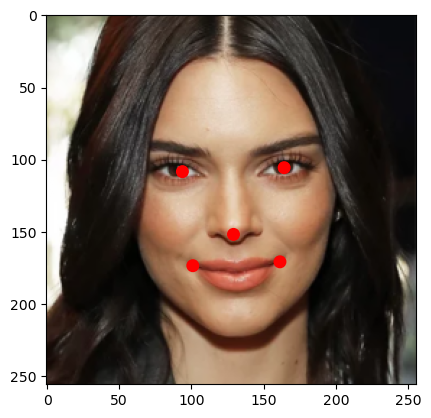

In [62]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=(256), margin=2)
_,_,lmdks = mtcnn.detect((gt.permute(0,2,3,1)+1)/2*255,landmarks=True)

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [58]:
def torch2np(x):
    x = np.array(x)
    return (x+1)/2

def np2torch(x):
    return 2*torch.tensor(x)-1

def np2img(x):
    return x.transpose((1,2,0))

In [47]:

import matplotlib.pyplot as plt
import numpy as np

In [63]:
lmdks.shape

(1, 1, 5, 2)

In [75]:
landmark, lmdks

(array([[ 93.726494, 108.204956],
        [164.20633 , 105.466446],
        [129.11676 , 151.68478 ],
        [100.95699 , 173.36136 ],
        [161.301   , 170.68387 ]], dtype=float32),
 array([[[[ 92.67476 , 107.27237 ],
          [164.77368 , 105.944305],
          [130.62863 , 151.47723 ],
          [101.3396  , 173.59944 ],
          [162.16394 , 171.23392 ]]]], dtype=float32))

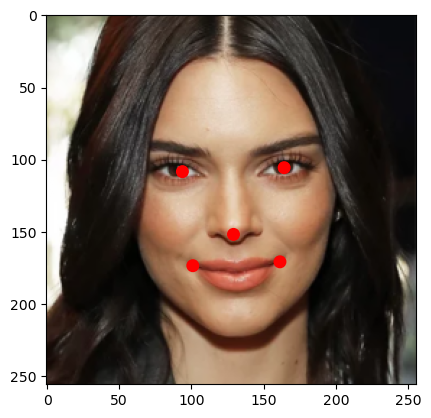

In [71]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(gt_np/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((landmark[i,0],landmark[i,1]),4, color='r')
    ax.add_patch(circ)

# Show the image
plt.show()

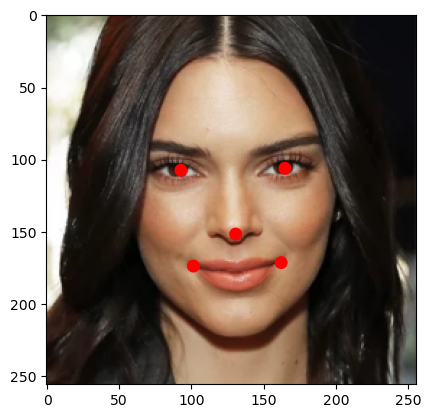

In [73]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(gt_np/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((lmdks[0,0,i,0],lmdks[0,0,i,1]),4, color='r')
    ax.add_patch(circ)

# Show the image
plt.show()

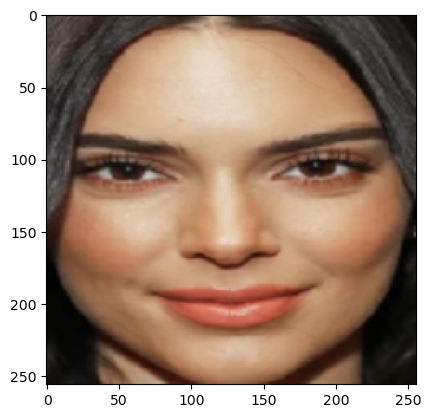

In [59]:
plt.imshow(np2img(torch2np(img_cropped[0])))

In [23]:
gt.min()

tensor(-1.)

In [16]:
gt.shape

torch.Size([1, 3, 256, 256])

In [76]:
print(kps)

print(landmark.shape)

[[[ 93.726494 108.204956]
  [164.20633  105.466446]
  [129.11676  151.68478 ]
  [100.95699  173.36136 ]
  [161.301    170.68387 ]]]
(5, 2)


In [48]:
from training.mobile_face_net import load_face_landmark_detector
landmark_detector = load_face_landmark_detector()
REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
kps_tensor= landmark_detector.get_face_landmark(gt)

REFERENCE_FACIAL_POINTS[0][0]

30.29459953

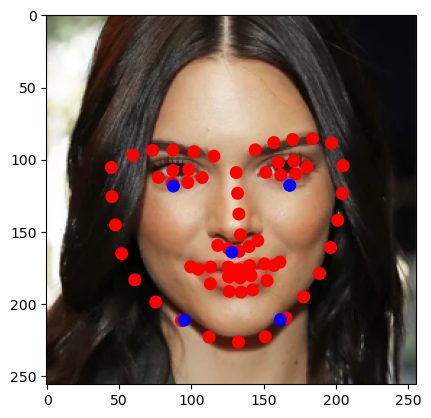

In [61]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
kps_tensor.shape
ax.imshow(gt_np/255)
kps_tensor = np.array(kps_tensor)
# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(68):
    circ = Circle((kps_tensor[0,i,0],kps_tensor[0,i,1]),4, color='r')
    ax.add_patch(circ)
    pass
for i in range(5):
    circ = Circle((REFERENCE_FACIAL_POINTS[i][0]*256/112+8*256/112,REFERENCE_FACIAL_POINTS[i][1]*256/112),4, color='b')
    ax.add_patch(circ)
plt.show()


In [18]:
kps.shape

(1, 5, 2)

In [50]:
w_np = (np.array(w_middle[0].permute(1,2,0)) + 1)*127.5
landmark = landmarkModel.get(w_np)
aligned_img_w = align_img(w_np, landmark, size=224)

2022-12-13 15:51:10.281450548 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-13 15:51:10.281631948 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-13 15:51:10.281768567 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-13 15:51:10.282593856 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-13 15:51:10.282760555 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-13 15:51:10.282907445 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

In [49]:
wp_np = (np.array(wp_middle[0].permute(1,2,0)) + 1)*127.5
landmark = landmarkModel.get(wp_np)
aligned_img_wp = align_img(wp_np, landmark, size=224)

2022-12-13 15:51:05.141769847 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-13 15:51:05.141939726 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-13 15:51:05.142096616 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-13 15:51:05.142947904 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-13 15:51:05.143119014 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-13 15:51:05.143265884 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

In [21]:
w_middle[0].shape

torch.Size([3, 256, 256])

In [45]:
aligned_img_w.min()

2.4224374

In [46]:
criterion_ID(torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.], grad_fn=<RsubBackward1>)

In [47]:
criterion_ID(torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_gt.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.4597], grad_fn=<RsubBackward1>)

In [53]:
criterion_ID(torch.tensor(aligned_img_wp.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_gt.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.1272], grad_fn=<RsubBackward1>)

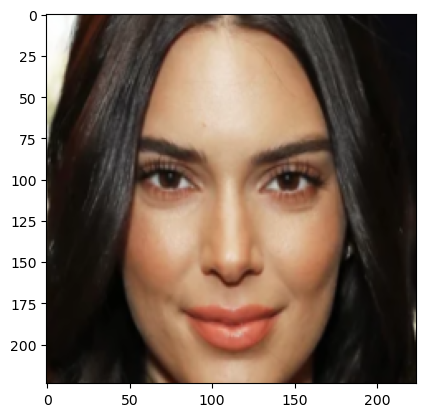

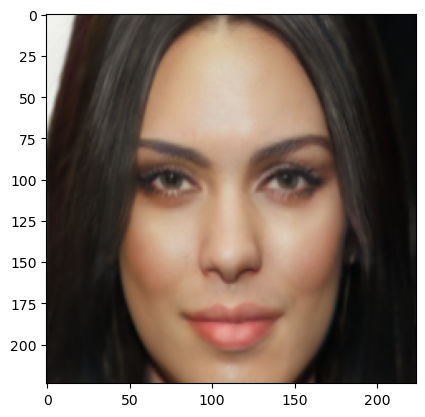

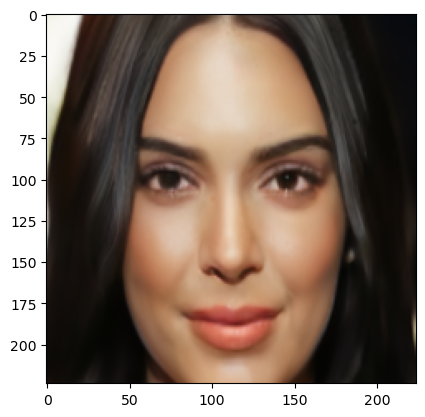

In [52]:
import matplotlib.pyplot as plt
plt.imshow(aligned_img_gt/255)
plt.show()
plt.imshow(aligned_img_w/255)
plt.show()
plt.imshow(aligned_img_wp/255)

In [ ]:
landmark = landmarkModel.get(gt)
aligned_img, back_matrix = align_img(img, landmark, image_size=224)

align = face_align(landmarkModel, '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/jaeseong2.png')

In [35]:
align.shape, align.max(), align.min()

((224, 224, 3), 255, 16)

In [7]:
align.shape

AttributeError: 'NoneType' object has no attribute 'shape'